# Fetal Health Classification - By Prateek Dutta

Classify fetal health in order to prevent child and maternal mortality.

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

It is a Classification Task.

Algorithms & Techniques Used:-
Principle Component Analysis (PCA)

KNN,

Random Forest Classifier,

Support Vector Machine (SVM)

Logistic Regresiion

In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [4]:
cd/gdrive/MyDrive/Fetal Health classification/

/gdrive/MyDrive/Fetal Health classification


In [5]:
ls

fetal_health.csv


In [6]:
import pandas as pd
import numpy as np
data=pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**Minor Observation:** Attributes such as severe_decelerations,prolongues_decelerations are more or less constant with few variation. We may remove those. Have taken care of these in Dimensionality Reduction.

In [9]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
X=data.drop(['fetal_health'],axis=1)
y=data['fetal_health']

# DATA VISUALIZATIONS AND EDA

Text(0.5, 1.0, 'Number of samples of each class')

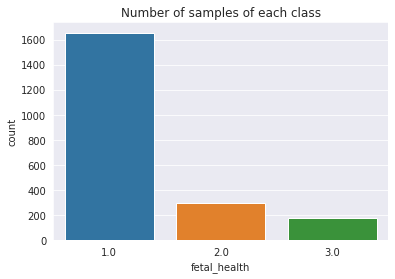

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=data,x='fetal_health')
plt.title("Number of samples of each class")

Observation: An highly Imbalanced Dataset. Which is obvious as Normal would be dominant.

Solution: Oversampling of the minority classes. To make better predictions.(Will perform later in the notebook)

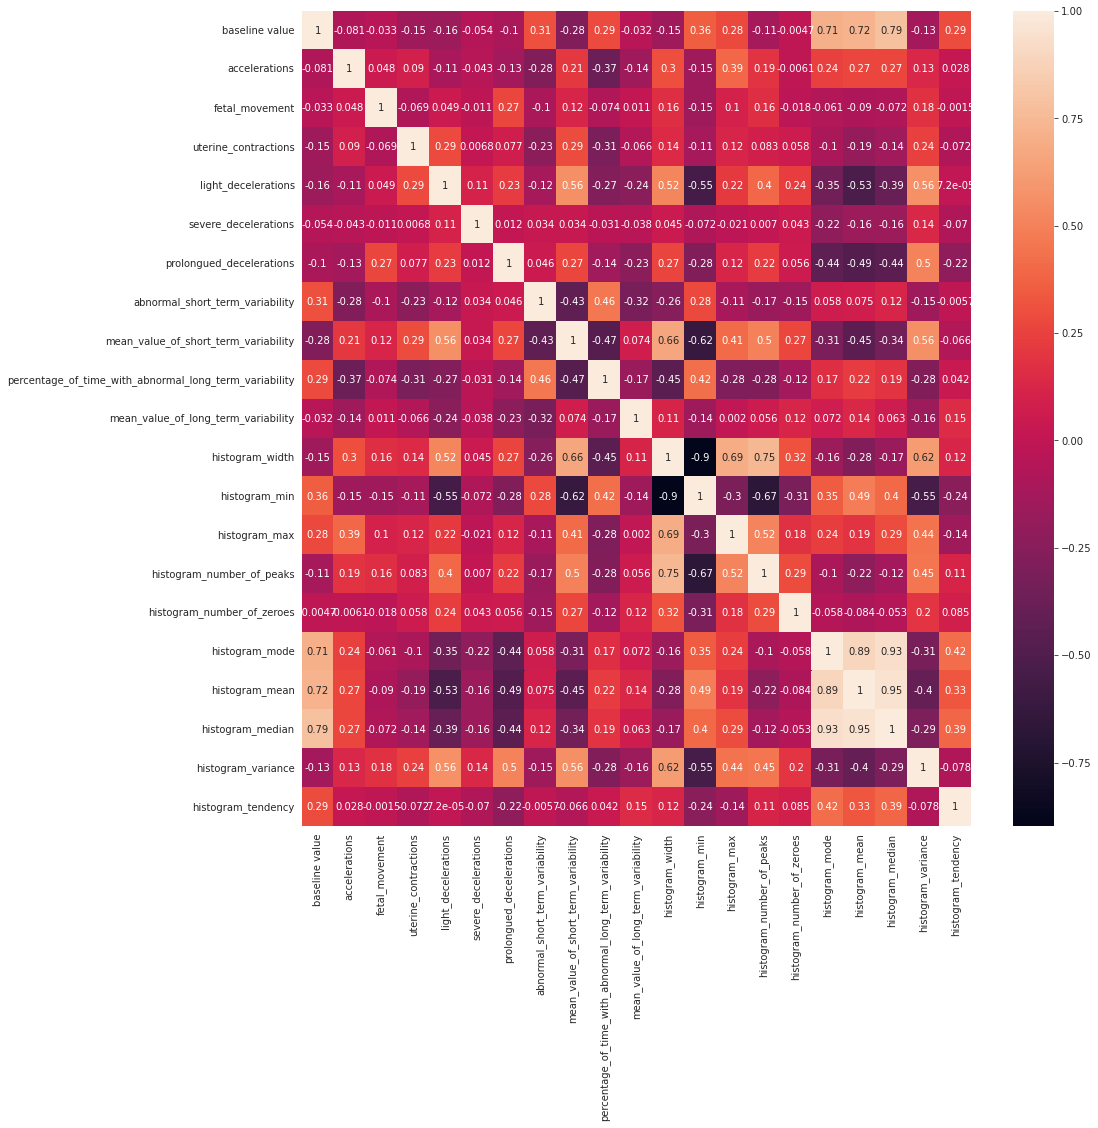

In [12]:
corr=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

Observations: > histogram mean,median,mode have high correlations.The distribution may towards normal.

In [13]:
grouped=data.groupby(by='fetal_health').mean()
grouped

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


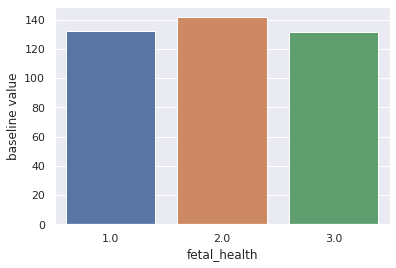

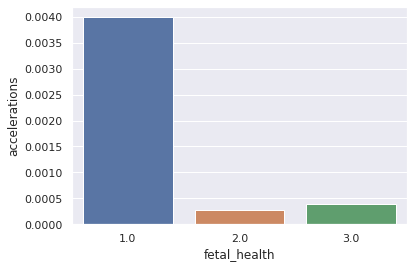

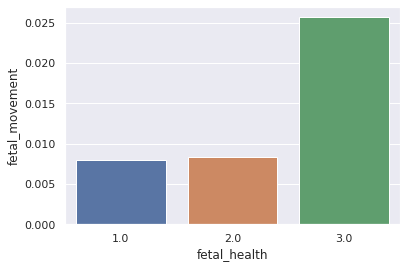

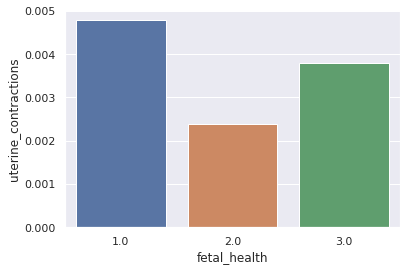

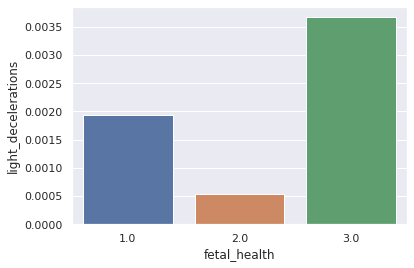

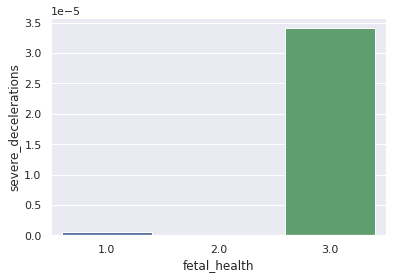

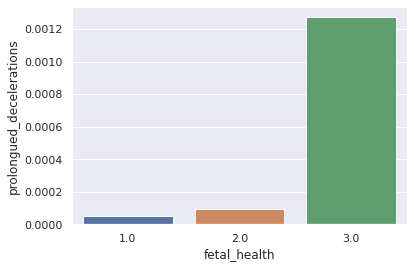

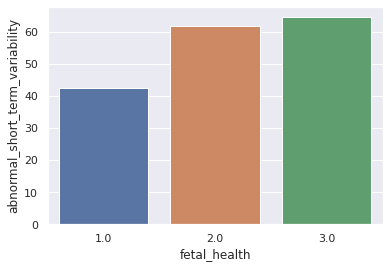

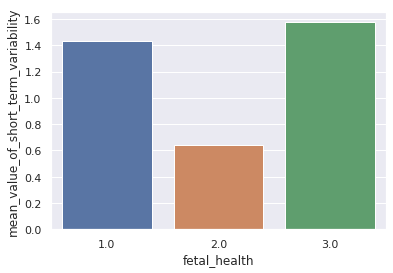

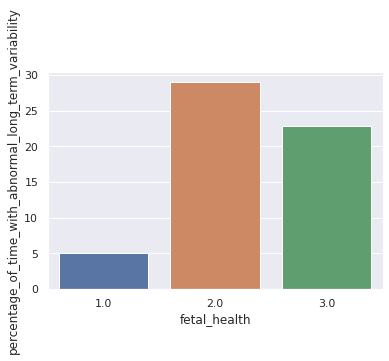

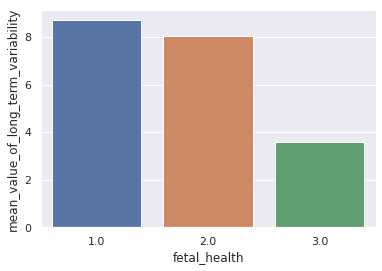

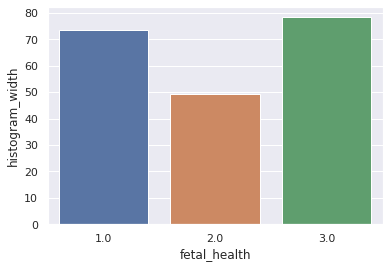

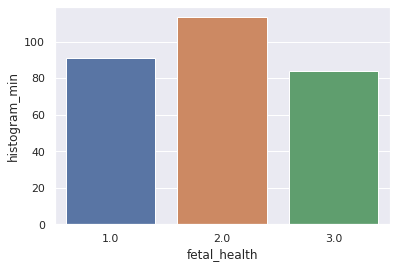

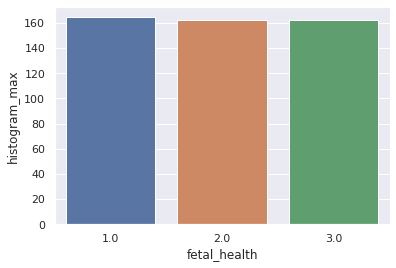

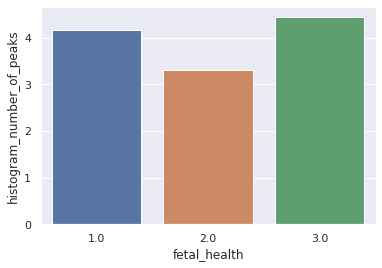

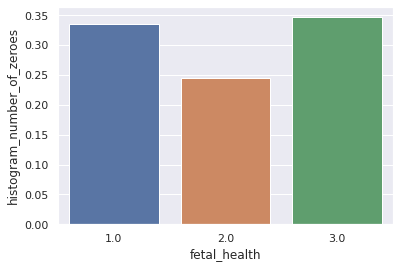

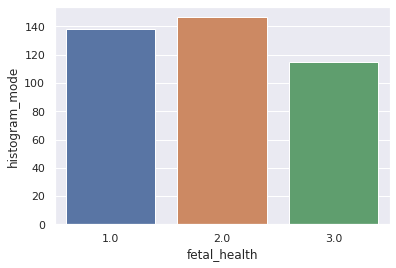

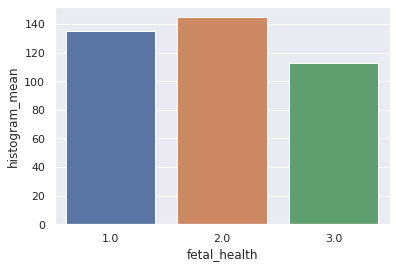

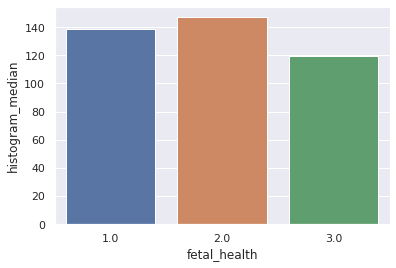

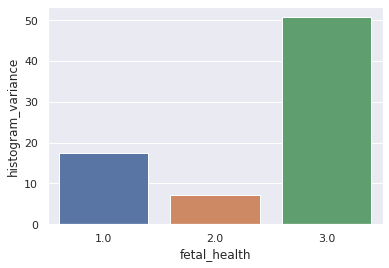

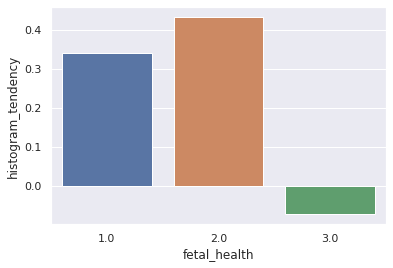

In [14]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for index,i in enumerate(grouped.columns,start=1):
    plt.figure(figsize=(6,4))
    sns.barplot(data=grouped,x=grouped.index,y=grouped[i])
    plt.show()

# Oversampling of Minority Class

In [15]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)


In [16]:
y_over

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4960    3.0
4961    3.0
4962    3.0
4963    3.0
4964    3.0
Name: fetal_health, Length: 4965, dtype: float64

In [17]:
X_over

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,128.0,0.000,0.000,0.000,0.000,0.0,0.000,80.0,0.5,0.0,...,16.0,114.0,130.0,0.0,0.0,126.0,124.0,125.0,1.0,1.0
4961,123.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.3,91.0,...,9.0,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.0,0.0
4962,148.0,0.000,0.015,0.000,0.000,0.0,0.000,74.0,0.2,78.0,...,14.0,139.0,153.0,0.0,0.0,148.0,148.0,149.0,0.0,0.0
4963,134.0,0.002,0.002,0.000,0.002,0.0,0.004,63.0,1.5,0.0,...,100.0,71.0,171.0,4.0,1.0,89.0,105.0,105.0,72.0,-1.0


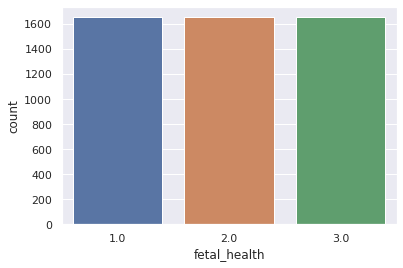

In [18]:
sns.countplot(data=pd.DataFrame(y_over),x='fetal_health')

Now All the classes have same number of samples! Lets do some Dimensionality reduction to get more insights

# Dimensionality Reduction and visualization

First lets scale the data!

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_over)


In [20]:
X_scaled=pd.DataFrame(X_scaled,columns=X_over.columns)
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.487737,-0.518831,-0.2234,-1.148097,-0.620686,-0.1106,-0.453125,0.969447,-0.703316,0.905412,...,-0.063539,-1.029827,-1.954868,-0.629756,-0.413141,-0.583226,0.280400,-0.771522,1.123735,1.165507
1,-0.307154,1.503409,-0.2234,0.728442,0.282598,-0.1106,-0.453125,-2.304911,0.882859,-0.740543,...,1.435134,-0.849639,1.839986,0.653666,0.962610,0.343389,0.232881,0.258386,-0.297374,-0.355719
2,-0.208772,0.492289,-0.2234,1.353955,0.282598,-0.1106,-0.453125,-2.363381,0.882859,-0.740543,...,1.435134,-0.849639,1.839986,0.332811,0.962610,0.343389,0.185361,0.149974,-0.274077,-0.355719
3,-0.110390,0.492289,-0.2234,1.353955,0.282598,-0.1106,-0.453125,-2.363381,1.180267,-0.740543,...,1.139941,-1.300110,0.364210,2.257944,-0.413141,0.166891,0.137841,0.095769,-0.274077,1.165507
4,-0.307154,1.840449,-0.2234,1.353955,-0.620686,-0.1106,-0.453125,-2.363381,1.180267,-0.740543,...,1.139941,-1.300110,0.364210,1.616233,-0.413141,0.166891,0.232881,0.149974,-0.320671,1.165507


In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) #getting 3 components with highest variance
X_pca=pca.fit_transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,-0.456224,-2.196278,0.739230
1,1.810614,3.298863,0.922032
2,1.798149,3.190905,0.986837
3,1.675668,3.755197,1.934113
4,1.366082,3.862647,2.302672


In [22]:
import plotly.express as px
fig = px.scatter_3d(X_pca, x=0, y=1, z=2,
              color=y_over, size_max=10)
fig.show()

Not much information by checking this graph!

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca_final=pca.fit_transform(X_scaled)
X_pca_final=pd.DataFrame(X_pca_final)
X_pca_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.456225,-2.196314,0.739475,1.064280,0.866814,-1.167097,1.590631,-0.391780,0.155364,-0.513422,0.856840,0.740998,-0.896260
1,1.810615,3.298899,0.921648,-0.547168,-0.537194,0.494034,0.075221,0.874455,0.318385,0.423627,0.399957,-0.187414,0.519862
2,1.798150,3.190966,0.986225,-0.103543,-0.491699,0.403972,-0.958053,0.644258,-0.281307,0.620269,0.498293,-0.323189,0.346651
3,1.675668,3.755253,1.933672,0.910215,0.975014,-0.497962,-0.243011,-0.280089,-1.704804,0.872942,0.743268,-0.722712,0.435212
4,1.366083,3.862748,2.301864,-0.126978,0.716038,-0.466695,0.487525,-0.253568,-1.063606,0.140525,0.979554,-0.890941,0.020421


# Model Building

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca_final,y_over,random_state=42,stratify=y_over)

## K-Nearest Neighbor

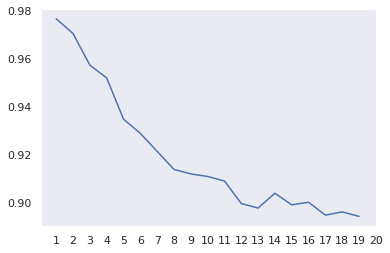

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

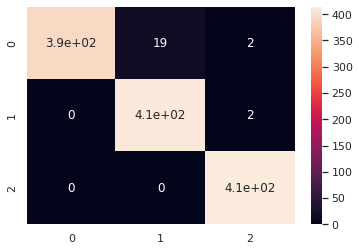

In [26]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(confusion_knn,annot=True)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       414
         2.0       0.96      1.00      0.98       414
         3.0       0.99      1.00      1.00       414

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



Although got 98% still not satisfied because neighbor=1 usually mean my model is very much dependent on just its neighbor may not work on new data. Lets try new models

# Support Vector Machine

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       414
         2.0       1.00      1.00      1.00       414
         3.0       1.00      1.00      1.00       414

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



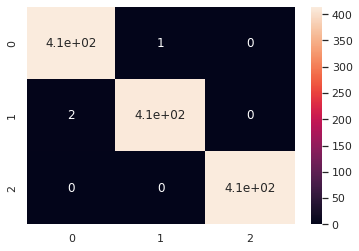

In [28]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_svc,annot=True)
print(classification_report(y_test,y_pred_svc))

In [29]:
rcv.best_params_

{'C': 10, 'gamma': 100}

Support Vector Classifier has done a tremendous job!! I dont think we require to move for new models but just for learning lets explore!!

# Logistic Regression

              precision    recall  f1-score   support

         1.0       0.93      0.85      0.89       414
         2.0       0.79      0.84      0.81       414
         3.0       0.88      0.90      0.89       414

    accuracy                           0.86      1242
   macro avg       0.87      0.86      0.86      1242
weighted avg       0.87      0.86      0.86      1242



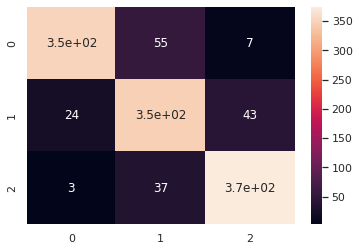

In [30]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[30,50,70,150,200,300,400,500,700,1200,1500]}
log=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
sns.heatmap(confusion_log,annot=True)
print(classification_report(y_test,y_pred_log))

# Random Forest Classifier

              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       414
         2.0       0.95      1.00      0.97       414
         3.0       0.99      1.00      1.00       414

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



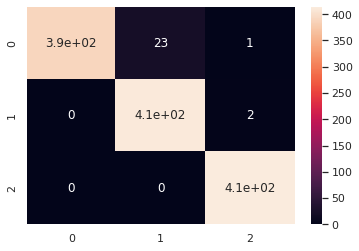

In [31]:
param_grid = {
'n_estimators': [50, 100, 150, 200],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_rcv,annot=True)
print(classification_report(y_test,y_pred_rcv))

# Saving model

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       414
         2.0       1.00      1.00      1.00       414
         3.0       1.00      1.00      1.00       414

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



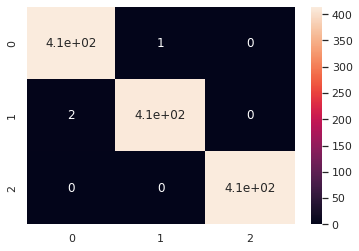

In [32]:
model=SVC(gamma=100,C=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_svc,annot=True)
print(classification_report(y_test,y_pred_svc))

In [33]:
import pickle
with open('FetalHealthClassificationFinal','wb') as f:
    pickle.dump(model,f)

**This project had few main steps**
1. Oversampling of minority class
2. Dimensionality Reduction

**Rest all Data Exploration,Data Preprocessing and Model Building stays the same!**